# # Introduzione ai classificatori

Nel seguente programma introduciamo i passi base della classificazione degli esempi di un dataset rappresentato come una matrice

Importiamo il package per l'apprendimento degli alberi

In [1]:
from sklearn import tree 

Definiamo la matrice con i dati (un esempio per riga)
e il vettore con il corrispondente valore della variabile target 

In [2]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Dichiariamo il modello di classificazione che vogliamo usare e poi lo adattiamo (fit) ai dati

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Prediciamo il valore della variabile target (e lo visualizziamo) per i dati passati, e usiamo il modello 'fittato' in clf

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


Visualizziamo l'albero appreso. 

---
Prima importiamo la libreria per la visualizzazione dei grafi (graphviz).
Poi esportiamo il classificatore in clf in una variabile che contiene la sua descrizione nel linguaggio dot.

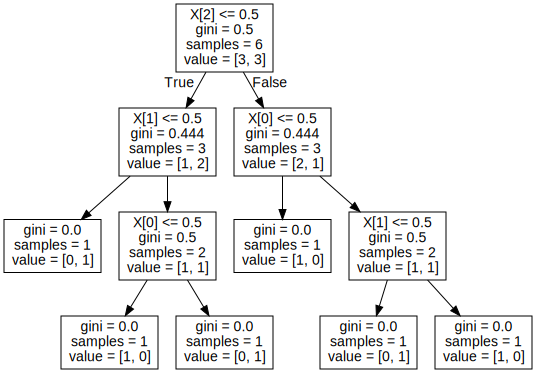

In [5]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)  # converte il modello in dot language
graph = graphviz.Source(dot_data)  
graph

value è vettore che contiene le statistiche del numero di esempi del vettore che hanno etichette true e false. La condizione di split confronta l'elemento del vettore con una soglia t. Valuta i Gini index, i nodi con gini 0 sonno foglie, e hanno un singolo esempio. L'algoritmo ha fatto  overfitting, non fa pruning. Questo perchè in fit abbiamo semplicemente lanciato la primitiva di fitting. 

Nel seguito usiamo il dataset Iris (dall'archivio dell'Università della California di Irvine (UCI) di Machine Learning)

In [6]:
from sklearn.datasets import load_iris # scienziato dell'analisi dei fiori della natura
iris = load_iris() 

# Dichiariamo il tipo del modello predittivo e i parametri dell'apprendimento dell'algoritmo di induzione del modello ad albero

In [7]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
# usa come criterio di split entropy invece che gini (default)
# inizia in maniera casuale (random_state=300), altrimenti usa sempre la stessa sequenza
# min_samples_leaf=5, almeno 5 esempi per foglia, se scende sotto 5, non splitto. Avrei overfitting altrimenti.
# class_weight={0:1,1:1,2:1} pesa le classi in modo da non avere un bias verso una classe, altrimenti potrebbe scegliere sempre la classe con più esempi, in questo caso 50/50/50. Hanno tutte lo stesso peso

# Dividiamo il dataset in training e test set

In [8]:
# Generiamo una permutazione casuale degli indici degli esempiche verranno usati per il training e il test set
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(0)

indices = np.random.permutation(len(iris.data))

# Decidiamo di tenere gli ultimi 10 indici per il test set, i rimanenti per il training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # teniamo per il training tutti gli elementi della  matrice tranne gli ultimi 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # teniamo da parte gli ultimi 10 elementi per il test set
iris_y_test  = iris.target[indices_test]

 # split dataset in training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1) # 70% training and 30% test

# Fittiamo il modello sul training set

In [9]:
# fit the model to the training data
clf = clf.fit(X_train, y_train)
clf_2 = clf.fit(iris_X_train, iris_y_train)

# Otteniamo le predizioni

In [10]:
print("My model:")
predicted_y_test = clf.predict(X_test)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(y_test) 
print(iris.target_names)

print("\n\nRosa Meo's model:")
predicted_Y_test_2 = clf.predict(iris_X_test)
print("Predictions:")
print(predicted_Y_test_2)
print("True classes:")
print(iris_y_test)

My model:
Predictions:
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
True classes:
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
['setosa' 'versicolor' 'virginica']


Rosa Meo's model:
Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]


Visualizza l'indice delle instanze di test e le corrispondenti predizioni

In [11]:
# print the corresponding instances indexes and class names for the 2th model 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: setosa	 True: versicolor

Instance # 70: 
Predicted: versicolor	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: virginica	 True: setosa

Instance # 9: 
Predicted: versicolor	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: setosa	 True: versicolor

Instance # 117: 
Predicted: setosa	 True: virginica

Instance # 47: 
Predicted: virginica	 True: setosa



# Vediamo alcuni esempi

In [12]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if j<len(iris.feature_names)-1: 
            s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: setosa	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: versicolor	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: virginica	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: versicolor	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

I

# Otteniamo i risultati delle predizioni (model performance results)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("My Model:")
accuracy = accuracy_score(y_test, predicted_y_test)
print("Accuracy: "+str(accuracy))
f1 = f1_score(y_test, predicted_y_test, average='macro')
print("F1: "+str(f1)) #2 * (precision * recall) / (precision + recall)

print("\n\nRosa Meo's model:")
acc_score = accuracy_score(iris_y_test, predicted_Y_test_2)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_Y_test_2, average='macro') # micro = media della matrice di confusione sulla base dei singoli valori predetti
                                                              # macro = fa prima precision e recall, poi fa media delle due
                                                              # a volte coincidono questi due valori
print("F1 score: "+str(f1))

My Model:
Accuracy: 0.9777777777777777
F1: 0.9781305114638448


Rosa Meo's model:
Accuracy score: 0.9
F1 score: 0.8857142857142858


# Usiamo la Cross Validation

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy, 5 folds. every fold is of size 30
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [25]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Mostriamo l'albero risultante 

## 1. Visualizza la figura dell'albero in un file PDF

In [16]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Genera la figura

In [17]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


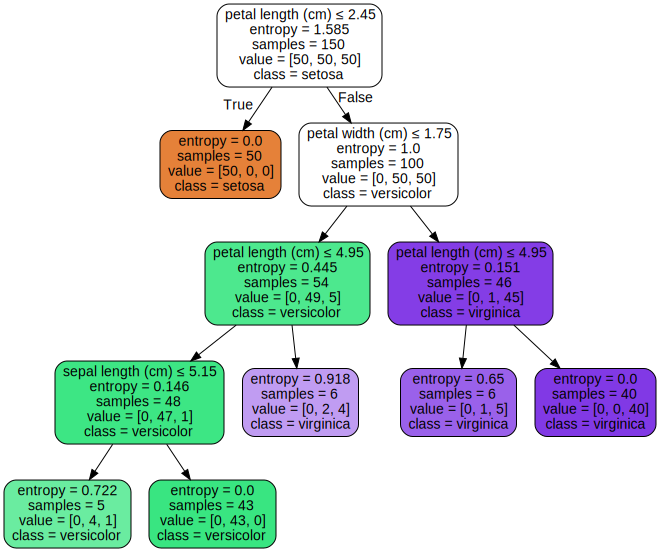

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  # più il nodo è statisticamente sbilanciato verso una classe e più il colore sarà intenso
graph

- Entropia massima è 1.585, ossia log in base 2 di 3 (numero classi) minima 0 
- fa gli split in base a petal length, nel primo caso sono tutti della classe setosa dopo il primo split true
- 3 colori, arancione verde e viola in base alla classe, la classe è scelta in base alla calsse di maggioranza


# Le celle seguenti le creerete voi: ecco cosa dovete fare 
Modificare questo Jupyter notebook sui decision trees sul dataset Iris e svolgete i seguenti compiti:

1. applicate un sovracampionamento (artificial inflation) ad una classe nel training set con un determinato fattore: 10 (si pesi di più una delle classi tra virginica o versicolor che sono più difficili da discriminare). Si apprenda l'albero di decisione in queste condizioni.
1.b) modifcare i pesi della stessa classe (si metta a 10 il peso per l'errata predizione ad esempio di Virginica in Versicolor o viceversa) e si apprenda  l'albero in queste condizioni. Dovreste ottenere risultati simili a quelli del punto 1.
2. si apprendano gli alberi cercando di evitare l'overfitting (migliorando l'errore sul test set) facendo 'tuning' degli iper-parametri: il minimo numero dei campioni per foglia, la massima profondità dell'albero, i parametri di minomo decremento dell'impurezza, massimo numero dei nodi foglia, ecc.
3. si costruisca la matrice di confusione dell'albero creato  sul test set e la si visualizzi. 
4. si costruiscano le curve ROC (o curve nello spazio di coverage) e le si mostri per ciascun modello ad albero creato su un problema binario (con 1 sola classe positiva): per ciascun modello dovete costruire tre curve, una per ciascuna classe, considerata a turno la classe positiva.

1. aggiunge 10 esempi per ogni esempio di quella classe, così dovremmo migliorare precision e recall
2. modificare i pesi della classe di cui avevamo cambaito gli esempi (da quell odi base)
3. evitare ovverfitting usando altri elementi di tuning, come la profondità dell'albero, il numero minimo di esempi per foglia, ecc
4. matrice di confusione, per ogni classe, per ogni modello, visualizzare i risultati. C'è chiamata di matrice di confusione su scikit learn
5. roc curve in modalità one vs rest. C'è funzione roc_curve in scikit_learn. una per ciascuna delle tre classi.

### 1. Sovracampionamento